In [3]:
import warnings
warnings.filterwarnings('ignore')

import os 


In [4]:
dir_Path = "/home/abdel/Documents/DOTNET_Project/Data backup/DataRepo/TEST"
os.chdir(dir_Path)

In [37]:
import pandas as pd 

Reviewdata = pd.read_csv('merged_revs.csv')

In [38]:
Reviewdata.shape

(23695, 7)

In [39]:
Reviewdata.head()

,Unnamed: 0,month,rate,title,review,name,city
0,0,April 2012,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
1,1,December 2012,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
2,2,December 2012,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
3,3,October 2012,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes
4,4,January 2013,5,Perfection,Truly beautiful Riad and service exceptional.A...,Hotel_Spa_Riad_Dar_Bensouda,Fes_Fes_Meknes


In [8]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30693 entries, 0 to 30692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review_date  30693 non-null  object
 1   Stars        30693 non-null  int64 
 2   ShortReview  30692 non-null  object
 3   Review       30693 non-null  object
 4   hotelName    29406 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.2+ MB


In [40]:
Reviewdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,23695.0,11847.000000,6840.30165,0.0,5923.5,11847.0,17770.5,23694.0
rate,23695.0,4.412956,0.98345,1.0,4.0,5.0,5.0,5.0


# DATA CLEANING 

In [41]:
count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull()).sum()/len(Reviewdata)*100).sort_values(ascending=False)

missing_data = pd.concat([count, percentage], axis=1, keys =['count','percentage'])
print('count and percentage of missing values for columns')

missing_data

count and percentage of missing values for columns


,count,percentage
city,14560,61.447563
title,1,0.004220
Unnamed: 0,0,0.000000
month,0,0.000000
rate,0,0.000000
review,0,0.000000
name,0,0.000000


In [43]:
Reviewdata.drop(columns=['month','name'], inplace=True)

Percentage for default

5    64.85
4    21.02
3     7.95
1     3.25
2     2.93
Name: rate, dtype: float64


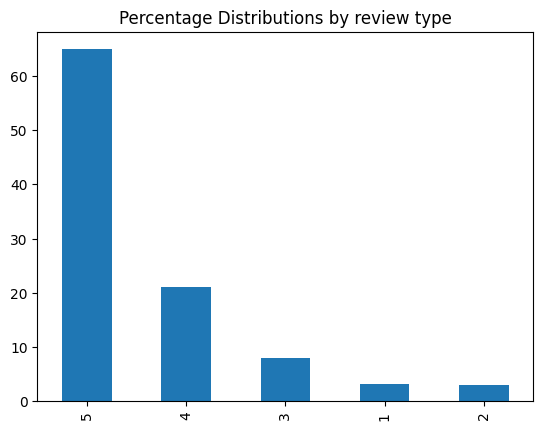

In [46]:
##DATA CLEANING 
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.rate.value_counts(normalize=True)*100,2))
round(Reviewdata.rate.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()


In [48]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [50]:
# Let's take a look at the updated text
Reviewdata['cleaned_Reviews'] = pd.DataFrame(Reviewdata.review.apply(cleaned1))
Reviewdata.head(10)

,Unnamed: 0,rate,title,review,city,cleaned_Reviews
0,0,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Fes_Fes_Meknes,we stayed here for a few nights after staying ...
1,1,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Fes_Fes_Meknes,my wife and i were in morocco for about days ...
2,2,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Fes_Fes_Meknes,we loved the staff here this gorgeous restorat...
3,3,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Fes_Fes_Meknes,i feel like the other reviewers have already s...
4,4,5,Perfection,Truly beautiful Riad and service exceptional.A...,Fes_Fes_Meknes,truly beautiful riad and service exceptionalal...
5,5,5,Absolutely amazing,Oh my goodness I could not rate this hotel any...,Fes_Fes_Meknes,oh my goodness i could not rate this hotel any...
6,6,5,Great stay,I enjoyed every bit of my stay at Riad Dar Ben...,Fes_Fes_Meknes,i enjoyed every bit of my stay at riad dar ben...
7,7,5,A fine riad with great service,The riad is in the heart of the medina and is ...,Fes_Fes_Meknes,the riad is in the heart of the medina and is ...
8,8,5,Wonderful oasis in the Medina!,We enjoyed our stay at Dar Bensouda! Hamid cou...,Fes_Fes_Meknes,we enjoyed our stay at dar bensouda hamid coul...
9,9,4,Hidden gem in the Medina,Absolutely loved our stay at Dar Bensouda. Lik...,Fes_Fes_Meknes,absolutely loved our stay at dar bensouda like...


In [54]:
Reviewdata.head()

,Unnamed: 0,rate,title,review,city,cleaned_Reviews
0,0,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Fes_Fes_Meknes,we stayed here for a few nights after staying ...
1,1,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Fes_Fes_Meknes,my wife and i were in morocco for about days ...
2,2,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Fes_Fes_Meknes,we loved the staff here this gorgeous restorat...
3,3,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Fes_Fes_Meknes,i feel like the other reviewers have already s...
4,4,5,Perfection,Truly beautiful Riad and service exceptional.A...,Fes_Fes_Meknes,truly beautiful riad and service exceptionalal...


In [55]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [56]:
# Let's take a look at the updated text
Reviewdata['Cleaned_R'] = pd.DataFrame(Reviewdata['cleaned_Reviews'].apply(cleaned2))
Reviewdata.head(10)

,Unnamed: 0,rate,title,review,city,cleaned_Reviews,Cleaned_R
0,0,5,"Unique, large & helpful",We stayed here for a few nights after staying ...,Fes_Fes_Meknes,we stayed here for a few nights after staying ...,we stayed here for a few nights after staying ...
1,1,5,The Best Riad in Fez,My wife and I were in Morocco for about 10 day...,Fes_Fes_Meknes,my wife and i were in morocco for about days ...,my wife and i were in morocco for about days ...
2,2,4,Gorgeous restoration,We loved the staff here! This gorgeous restora...,Fes_Fes_Meknes,we loved the staff here this gorgeous restorat...,we loved the staff here this gorgeous restorat...
3,3,5,"Beautiful, perfect, amazing.",I feel like the other reviewers have already s...,Fes_Fes_Meknes,i feel like the other reviewers have already s...,i feel like the other reviewers have already s...
4,4,5,Perfection,Truly beautiful Riad and service exceptional.A...,Fes_Fes_Meknes,truly beautiful riad and service exceptionalal...,truly beautiful riad and service exceptionalal...
5,5,5,Absolutely amazing,Oh my goodness I could not rate this hotel any...,Fes_Fes_Meknes,oh my goodness i could not rate this hotel any...,oh my goodness i could not rate this hotel any...
6,6,5,Great stay,I enjoyed every bit of my stay at Riad Dar Ben...,Fes_Fes_Meknes,i enjoyed every bit of my stay at riad dar ben...,i enjoyed every bit of my stay at riad dar ben...
7,7,5,A fine riad with great service,The riad is in the heart of the medina and is ...,Fes_Fes_Meknes,the riad is in the heart of the medina and is ...,the riad is in the heart of the medina and is ...
8,8,5,Wonderful oasis in the Medina!,We enjoyed our stay at Dar Bensouda! Hamid cou...,Fes_Fes_Meknes,we enjoyed our stay at dar bensouda hamid coul...,we enjoyed our stay at dar bensouda hamid coul...
9,9,4,Hidden gem in the Medina,Absolutely loved our stay at Dar Bensouda. Lik...,Fes_Fes_Meknes,absolutely loved our stay at dar bensouda like...,absolutely loved our stay at dar bensouda like...


In [58]:
from sklearn.model_selection import train_test_split

Independent_var = Reviewdata.Cleaned_R
Dependent_var = Reviewdata.rate

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 21325
IV_test  : 2370
DV_train : 21325
DV_test  : 2370


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


from sklearn.pipeline import Pipeline

In [60]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[  36,   10,    5,    0,    1],
       [   4,    1,    0,    0,    0],
       [  21,   33,   58,   24,    1],
       [  10,   17,   77,  207,   93],
       [  14,   12,   32,  272, 1442]])

In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.7358649789029535
Precision :  0.8004316867041658
Recall :  0.7358649789029535


In [69]:
exemple = ["super "]
result = model.predict(exemple)
print(result)

[5]
